<IPython.core.display.Javascript object>


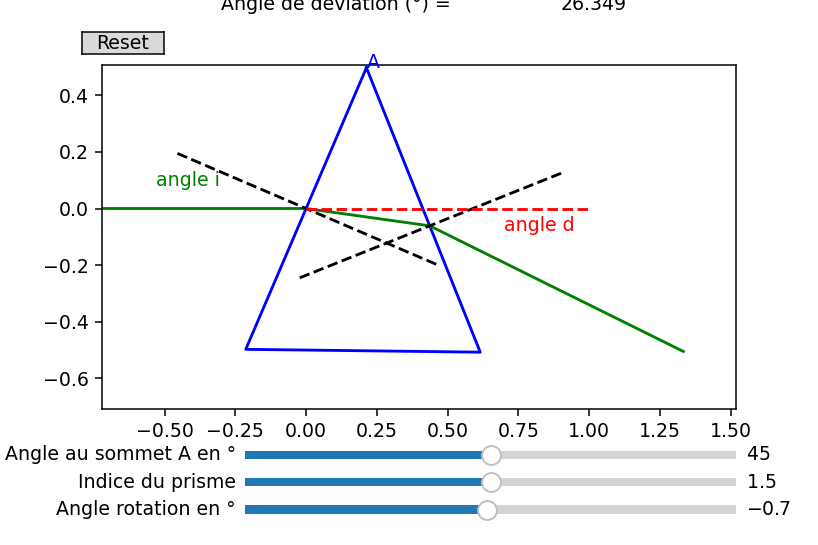

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt
#from matplotlib.patches import Polygon
#from defs_optique import dessine_rapporteur
from numpy import *
# interact prend en argument une fonction et ses valeurs possibles - jupyter
#from ipywidgets import interact
# ajout curseur et bouton
from matplotlib.widgets import Slider, Button

def rotation(x, y, theta):
    # matrice pour rotation d'un angle theta
    xr = x*cos(theta)-y*sin(theta)
    yr = x*sin(theta)+y*cos(theta)
    return(xr, yr)

def rayon(n, A, theta):
    # A et theta1 de degrés à radians
    A = A*pi/180                         # angle sommet du prisme
    p = tan(A/2)                         # on aura besoin de cette grandeur plusieurs fois
    theta = theta*pi/180                 # angle de rotation

    # données du tracé
    alpha1 = 0                           # angle incidence par rapport à l'horizontal
    theta1 = alpha1 + A/2 - theta        # angle d'incidence
    theta1prime = arcsin(sin(theta1)/n)  # angle de réfraction
    alpha2 = theta1prime - A/2           # pente du rayon intérieur
    theta2prime =   alpha2 - A/2         # angle d'incidence sur face 2
    normale2 = True                      # test tracé de la normale du rayon sortant


    # calcul des points P du rayon et des normales
    y1 = 0                                       # point P2 - origine
    x1 = y1*p                                    # point P2 - origine
    x0, y0 = x1 - cos(alpha1), y1 - sin(alpha1)  # point P1
    x = [x0, x1]                                 # rayon P1P2
    y = [y0, y1]                                 # rayon P1P2
    x5 = x1 + cos(alpha1)                        # point P5 pour direction rayon incident et définir déviation
    y5 = y1 + sin(alpha1)                        # point P5 pour direction rayon incident et définir déviation

    if (alpha2<A/2-pi/2):        # si le rayon intérieur ne ressort pas - à regarder
        x += [x[1] + cos(alpha2)]
        y += [y[1] + sin(alpha2)]
        normale2 = False
    else:                        # si le rayon intérieur ressort
        t2 = tan(alpha2)
        (x2i, y2i) = (p/(1+p*t2), p*t2/(1+p*t2))
        (x2, y2) = rotation(x2i, y2i, theta)  # point après rotation de theta
        x += [x2]                           # point P3
        y += [y2]                           # point P3
        # mettre le rayon réfléchi en cas de réflexion totale
        (x6i, y6i) = (x2i - 0.1*cos(alpha2-2*theta2prime), y2i - 0.1*sin(alpha2-2*theta2prime))
        (x6,y6) = rotation(x6i, y6i, theta) # point P6 après rotation

        if(abs(n*sin(theta2prime))<1):  # si pas de réflexion totale
            theta2 = arcsin(n*sin(theta2prime))
            alpha3 = theta2 + A/2
            (x3i, y3i) = (x2i + cos(alpha3), y2i + sin(alpha3))
            (x3, y3) = rotation(x3i, y3i, theta)  # point après rotation de theta
            x += [x3]                           # point P4
            y += [y3]                           # point P4
            normale2 = True
        else :
            normale2 = False

    # angle de déviation
    if normale2 == True :
        #D = alpha1 - alpha3
        D = - alpha3 - theta
        #print("Déviation en ° = ", D*180/pi)
    else :
        # à calculer si réflexion totale
        D = 0

    #print("theta1= ", theta1*180/pi)
    # les points P
    return(x, y, x2i, y2i, x5, y5, x6, y6, D, A, normale2,theta)


def dessin(x, y , x2i, y2i, x5, y5, x6, y6, D, A, normale2, theta):
    # affiche le rayon
    line.set_data(x, y)
    # afficher la normale entrante
    (x2nd, y2nd) = rotation(x[1]+0.5*cos(A/2), y[1]-0.5*sin(A/2), theta)  # point début normale après rotation de theta
    (x2nf, y2nf) = rotation(x[1]-0.5*cos(A/2), y[1]+0.5*sin(A/2), theta)  # point fin normale après rotation de theta
    norm1.set_data([x2nd, x2nf], [y2nd, y2nf])
    # afficher la normale entrante
    (x3nd, y3nd) = rotation(x2i+0.5*cos(A/2), y2i+0.5*sin(A/2), theta)  # point début normale après rotation de theta
    (x3nf, y3nf) = rotation(x2i-0.5*cos(A/2), y2i-0.5*sin(A/2), theta)  # point fin normale après rotation de theta
    norm2.set_data([x3nd, x3nf], [y3nd, y3nf])
    # afficher prisme
    p = tan(A/2)                         # on aura besoin de cette grandeur plusieurs fois
    # calcul des points du prisme après rotation
    (xa,ya)= rotation(0.5*p,0.5,theta)
    (xb,yb)= rotation(-0.5*p,-0.5, theta)
    (xc,yc)= rotation(1.5*p,-0.5, theta)
    prisme.set_data([xa, xb, xc, xa],[ya, yb, yc, ya])
    # prolongation du rayon incident
    prol.set_data([x[1], x5],[y[1], y5])
    # affichage de l'angle de déviation
    dev.set_text(round(D*180/pi,3))
    # affichage de l'angle d'incidence
    vanglei.set_text(round((A/2-theta)*180/pi,3))
    # affichage du rayon réfléchi si réflexion totale
    if normale2 == False :
        reftot.set_data([x[2], x6],[y[2], y6])
    else :
        reftot.set_data([],[])
    # indique l'angle theta1
    anglei.set_position(((x[0]+x2nf)/2+0.2, (y[0]+y2nf)/2-0.02))
    # indique l'angle de déviation
    angled.set_position(((x[1]+x5)/2+0.2, (y[1]+y5)/2-0.08))
    # indique l'angle A
    angleA.set_position((xa, ya))

    plt.draw()

def update_interact(n = (1.2, 1.8, 0.01), A = (0, 90, 1),theta1 = (0, 90, 1)):
    # A curseur interactif : réel entre 0 et 90 avec un pas de 1
    # n curseur interactif : réel entre 1.2 et 1.8 avec un pas de 0.01
    # theta1 curseur interactif : réel entre 0 et 90 avec pas de 1
    # on démarre à A=45°, n=1.5 et theta1=45°
    (x, y , x2i, y2i, x5, y5, x6, y6, D, A, normale2, theta) = rayon(n, A, theta)
    # dissocier le calcul des points et le tracé du dessin
    dessin(x, y , x2i, y2i, x5, y5, x6, y6, D, A, normale2, theta)
    fig.canvas.draw_idle()

def update(val):
    n = s_indice.val
    A = s_angleA.val
    theta = s_angle.val
    # à calculer
    theta1 = 0
    (x, y , x2i, y2i, x5, y5, x6, y6, D, A, normale2, theta) = rayon(n, A, theta)
    # dissocier le calcul des points et le tracé du dessin
    dessin(x, y , x2i, y2i, x5, y5, x6, y6, D, A, normale2, theta)
    fig.canvas.draw_idle()


A = 45                               # angle d'ouverture du prisme
p = tan(A*(pi/180)/2)                # on aura besoin de cette grandeur plusieurs fois
D = 0                                # initialisation angle déviation
n = 1.5                              # indice du prisme
theta1 = 45                          # angle d'incidence
theta = 0                            # angle rotation

fig, ax = plt.subplots(figsize=(6,4))
# même échelle sur les 2 axes
ax.axis('equal')
# définir les limites du graphe
ax.set(xlim=(-1,1.8),ylim=(-1.2,1))
# tracé du prisme en fonction de A à travers p=tan(A/2)
prisme, = ax.plot([0.5*p, -0.5*p, 1.5*p, 0.5*p],[0.5, -0.5, -0.5, 0.5], c='b')
# définition du rayon et des normales entrante et sortante
line, = ax.plot([],[], c='g')
norm1, = ax.plot([],[], linestyle='dashed', c='k')
norm2, = ax.plot([],[], linestyle='dashed', c='k')
# prolongation rayon incident pour voir déviation
prol, = ax.plot([],[], linestyle='dashed', c='r')
# rayon réfléchi si réflexion totale
reftot, = ax.plot([],[], c='g')
# affichage de l'angle de déviation
ax.text(-0.3, 0.7, "Angle de déviation (°) =")
dev = plt.text(0.9, 0.7, round(D,3))
# affichage de l'angle d'incidence
ax.text(-0.3, 0.8, "Angle d'incidence (°) =")
vanglei = plt.text(0.9, 0.8, round(A/2-theta,3))
# indique l'angle theta1
anglei = ax.annotate('angle i', xy =(0, 0), xytext =(0, 0), color = 'g')
# indique l'angle de déviation
angled = ax.annotate('angle d', xy =(0, 0), xytext =(0, 0), color = 'r')
# indique l'angle A
angleA = ax.annotate('A', xy =(0, 0), xytext =(0, 0), color = 'b')
# premier rayon
(x, y , x2i, y2i,  x5, y5, x6, y6, D, A, normale2, theta) = rayon(n, A, theta)
dessin(x, y , x2i, y2i, x5, y5, x6, y6, D, A, normale2, theta)
# voir positionnement intersection incident réfracté
#dessine_rapporteur(0,0,1.,0,90)


# place pour les curseurs
plt.subplots_adjust(bottom=0.25)
# ajout curseur angle A angle d'incidence indice prisme
ax_angleA = plt.axes([0.3, 0.15, 0.6, 0.03])
s_angleA = Slider(ax_angleA, "Angle au sommet A en °", 0, 90, valinit=45)
ax_indice = plt.axes([0.3, 0.1, 0.6, 0.03])
s_indice = Slider(ax_indice, "Indice du prisme", 1.0, 2.0, valinit=1.5)
ax_angle = plt.axes([0.3, 0.05, 0.6, 0.03])
s_angle = Slider(ax_angle, "Angle rotation en °", -45, 45, valinit=0)

# remise à l'initial des paramètres
resetax = plt.axes([0.1, 0.9, 0.1, 0.04])
button = Button(resetax, 'Reset')

def reset(event):
    s_indice.reset()
    s_angleA.reset()
    s_angle.reset()

button.on_clicked(reset)

s_indice.on_changed(update)
s_angleA.on_changed(update)
s_angle.on_changed(update)

#interact(update_interact);

plt.show()
